<a href="https://colab.research.google.com/github/jhryals/ml-labs-lockheed/blob/main/lab01_predictive_maintenance_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 01: Predictive Maintenance with Linear Regression

**Author**: Justin Howard Ryals  
**Goal**: Predict aircraft maintenance time using flight hours  
**Lockheed Relevance**: Forecast aircraft service time based on flight usage — foundational for predictive maintenance in aerospace sustainment.  
**Concepts Reinforced**: Linear regression, cost function, gradient descent, scalar vs. vectorized implementations


## 🔧 Step 1: Setup

We begin by importing the essential libraries:  
- `numpy` for numerical operations  
- `matplotlib.pyplot` for plotting


In [9]:
import numpy as np
import matplotlib.pyplot as plt


## 📊 Step 2: Simulate More Realistic Data

In this step, we simulate flight hour and maintenance time data based on realistic assumptions:

- Flight hours range between 100 to 800 hours  
- Maintenance time increases with flight hours but includes noise (simulating real-world variation)  
- This reflects a predictive maintenance use case for aircraft systems

We’ll scale flight hours to "hundreds of hours" to keep our numbers manageable and interpretable.


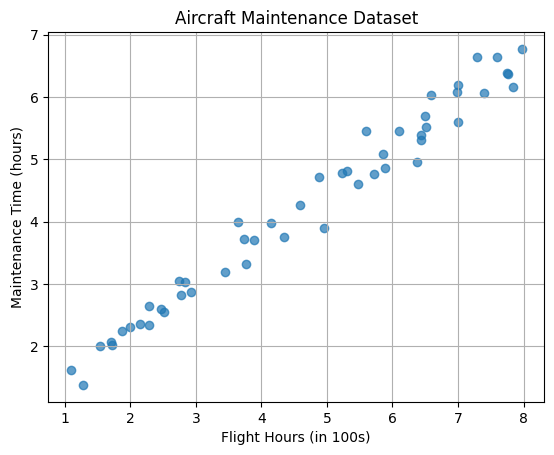

In [12]:
# Set seed for reproducibility
np.random.seed(0)

# Generate 50 flight hour records between 100 to 800 hours
x_train = np.random.randint(100, 800, 50) / 100  # Scale to hundreds of hours

# Simulate maintenance time: baseline + per-hour factor + noise
# Baseline: 1 hr, Per-hour: 0.7 hr, Gaussian noise ~ N(0, 0.3)
y_train = 1 + 0.7 * x_train + np.random.normal(0, 0.3, x_train.shape[0])

# Plot data
plt.scatter(x_train, y_train, alpha=0.7)
plt.xlabel("Flight Hours (in 100s)")
plt.ylabel("Maintenance Time (hours)")
plt.title("Aircraft Maintenance Dataset")
plt.grid(True)
plt.show()


## 🧮 Step 3: Define Cost Function

The cost function calculates how well our model fits the data.  
We’ll implement two versions of **Mean Squared Error (MSE)**:

- **Scalar version:** Uses Python loops (great for understanding what's happening under the hood)  
- **Vectorized version:** Uses NumPy operations for faster computation


In [14]:
# Scalar version (loop-based)
def compute_cost_scalar(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb = w * x[i] + b       # prediction
        cost += (f_wb - y[i])**2  # squared error
    return cost / (2 * m)

# Vectorized version
def compute_cost_vectorized(x, y, w, b):
    m = x.shape[0]
    f_wb = w * x + b
    cost = np.sum((f_wb - y) ** 2) / (2 * m)
    return cost


## 🎯 Step 4: Compute Gradients

To train our model, we need to update parameters using gradient descent.  
This requires calculating the gradient of the cost function with respect to the model parameters:

- `dj_dw`: Derivative of cost w.r.t. the weight `w`  
- `dj_db`: Derivative of cost w.r.t. the bias `b`

Again, we’ll provide both scalar and vectorized implementations to compare.


In [15]:
# Scalar version
def compute_gradient_scalar(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0.0
    dj_db = 0.0
    for i in range(m):
        err = (w * x[i] + b) - y[i]
        dj_dw += err * x[i]
        dj_db += err
    return dj_dw / m, dj_db / m

# Vectorized version
def compute_gradient_vectorized(x, y, w, b):
    m = x.shape[0]
    f_wb = w * x + b
    error = f_wb - y
    dj_dw = (1 / m) * np.dot(error, x)
    dj_db = (1 / m) * np.sum(error)
    return dj_dw, dj_db


## 🧠 Step 5: Gradient Descent Training Loop

Gradient Descent is an iterative method to find the optimal model parameters that minimize the cost.  
We update `w` and `b` step-by-step using the gradients computed in the previous step.

We'll run:

- A scalar loop version for conceptual understanding  
- A vectorized loop version for efficient computation


In [17]:
# Scalar version
def gradient_descent_scalar(x, y, w_in, b_in, alpha, num_iters):
    w = w_in
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_scalar(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i % 100 == 0:
            cost = compute_cost_scalar(x, y, w, b)
            print(f"Iter {i:4d}: Cost={cost:.4f}, w={w:.4f}, b={b:.4f}")
    return w, b

# Vectorized version
def gradient_descent_vectorized(x, y, w_in, b_in, alpha, num_iters):
    w = w_in
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_vectorized(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i % 100 == 0:
            cost = compute_cost_vectorized(x, y, w, b)
            print(f"[Vectorized] Iter {i:4d}: Cost={cost:.4f}, w={w:.4f}, b={b:.4f}")
    return w, b


## 🚀 Step 6: Train and Compare Both Versions

Now we’ll train the model using both implementations and observe:

- How the cost decreases over iterations  
- Whether both versions arrive at similar parameter values  
This comparison helps you appreciate how vectorization speeds up large-scale machine learning.


In [20]:
# Initialize parameters
initial_w, initial_b = 0.0, 0.0
alpha = 0.01
iterations = 10000

# Train using scalar version
print("Training using scalar implementation:")
w_s, b_s = gradient_descent_scalar(x_train, y_train, initial_w, initial_b, alpha, iterations)

# Train using vectorized version
print("\nTraining using vectorized implementation:")
w_v, b_v = gradient_descent_vectorized(x_train, y_train, initial_w, initial_b, alpha, iterations)


Training using scalar implementation:
Iter    0: Cost=5.4469, w=0.2309, b=0.0424
Iter  100: Cost=0.0560, w=0.8327, b=0.2523
Iter  200: Cost=0.0487, w=0.8177, b=0.3364
Iter  300: Cost=0.0434, w=0.8049, b=0.4080
Iter  400: Cost=0.0396, w=0.7940, b=0.4688
Iter  500: Cost=0.0368, w=0.7847, b=0.5206
Iter  600: Cost=0.0348, w=0.7769, b=0.5645
Iter  700: Cost=0.0334, w=0.7702, b=0.6020
Iter  800: Cost=0.0323, w=0.7645, b=0.6338
Iter  900: Cost=0.0316, w=0.7596, b=0.6608
Iter 1000: Cost=0.0310, w=0.7555, b=0.6838
Iter 1100: Cost=0.0306, w=0.7520, b=0.7034
Iter 1200: Cost=0.0303, w=0.7490, b=0.7200
Iter 1300: Cost=0.0301, w=0.7465, b=0.7342
Iter 1400: Cost=0.0300, w=0.7444, b=0.7462
Iter 1500: Cost=0.0299, w=0.7425, b=0.7564
Iter 1600: Cost=0.0298, w=0.7410, b=0.7651
Iter 1700: Cost=0.0297, w=0.7396, b=0.7725
Iter 1800: Cost=0.0297, w=0.7385, b=0.7788
Iter 1900: Cost=0.0297, w=0.7376, b=0.7841
Iter 2000: Cost=0.0297, w=0.7367, b=0.7887
Iter 2100: Cost=0.0296, w=0.7361, b=0.7925
Iter 2200: Cost=

## 🔍 Step 7: Predict and Visualize

Let’s:

- Predict maintenance time for a new aircraft with 850 flight hours  
- Plot the linear regression model over the training data  

This visualization gives you a sense of how well the model fits the real-world-inspired data.


Predicted maintenance time for 850 hours: 7.04 hours


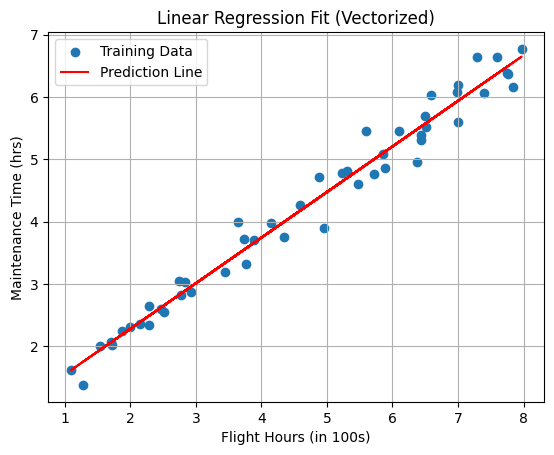

In [21]:
def predict(x, w, b):
    return w * x + b

# Prediction on new data point (e.g. 850 flight hours = 8.5 in hundreds)
new_hours = 8.5
pred = predict(new_hours, w_v, b_v)
print(f"Predicted maintenance time for 850 hours: {pred:.2f} hours")

# Visualize predictions
plt.scatter(x_train, y_train, label='Training Data')
plt.plot(x_train, predict(x_train, w_v, b_v), c='red', label='Prediction Line')
plt.xlabel("Flight Hours (in 100s)")
plt.ylabel("Maintenance Time (hrs)")
plt.title("Linear Regression Fit (Vectorized)")
plt.legend()
plt.grid(True)
plt.show()
